# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [80]:
# Read the data
df = pd.read_csv('./data/WHO_COVID19_cases.csv')

In [81]:
# Filter for three specific countries
countries_to_plot = ['Germany', 'France', 'Italy']
df_filtered = df[df['Country'].isin(countries_to_plot)]

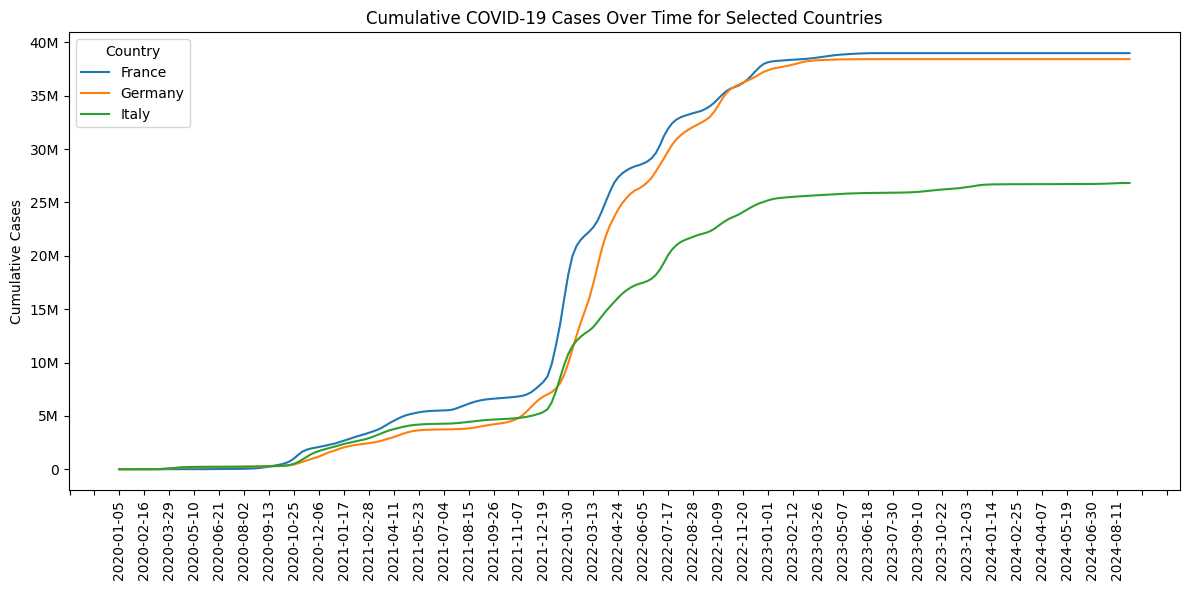

In [93]:
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_reported', y='Cumulative_cases', hue='Country', data=df_filtered)

# Improve the x-axis formatting (Rotating Dates by 90 degrees)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6))

# Format y-axis to show values in thousands
def millions_formatter(x, pos):
    return f'{int(x / 1000000)}M' if x >= 1000000 else str(int(x))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show the plot
plt.title('Cumulative COVID-19 Cases Over Time for Selected Countries')
plt.xlabel('')
plt.ylabel('Cumulative Cases')
plt.legend(title='Country')
plt.tight_layout()
# plt.show() -> if run outside of jupyter notebook

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [71]:
import plotly.express as px
import plotly.io as pio 

# Configure the rendering to ensure that the plots are rendered correctly in the notebook environment
pio.renderers.default = 'notebook'

In [72]:
# Read the data
df = pd.read_csv('./data/WHO_COVID19_cases.csv')

In [73]:
# Filter for three specific countries
countries_to_plot = ['France', 'Germany', 'Italy']
df_filtered = df[df['Country'].isin(countries_to_plot)]

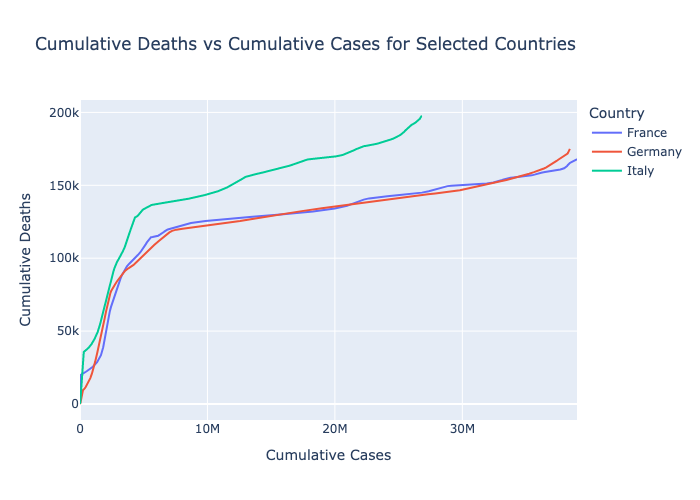

In [74]:
# Create the line plot
fig = px.line(
    df_filtered,
    x='Cumulative_cases',
    y='Cumulative_deaths',
    color='Country',
    title='Cumulative Deaths vs Cumulative Cases for Selected Countries',
    labels={
        'Cumulative_cases': 'Cumulative Cases',
        'Cumulative_deaths': 'Cumulative Deaths'
    }
)

# Show the plot
fig.show(renderer="png") # or "browser")